In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use(['science','ieee', 'no-latex']) # set the style of the plots

from util import *

In [9]:
logReg = pd.read_pickle('data/logistic_results.pkl')
logReg['cvResults'] = logReg['cvResults'].transform(pd.DataFrame)

metrics = logReg.testMetrics.iloc[0].keys() # get the metrics names

for metric in metrics:
    logReg['bestTest'+metric.capitalize()] = [d[metric] for d in logReg.testMetrics]
logReg.drop(columns=['testMetrics'], inplace=True)

logReg['bestParams'] = logReg['searchObj'].transform(lambda x: x.best_params_)
params = logReg.bestParams.iloc[0].keys()

for param in params:
    logReg['best'+param.capitalize()] = [d[param] for d in logReg.bestParams]
logReg.drop(columns=['bestParams', 'cvResults', 'searchObj'], inplace=True)
logReg

logReg

,numCat,nDims,bestTestAccuracy,bestTestPrecision,bestTestRecall,bestTestF1,bestTestRoc_auc,bestPenalty,bestL1_ratio,bestC
0,3,27,0.745409,0.478286,0.856214,0.613736,0.869593,l2,0.1,1.0
1,5,41,0.737424,0.470757,0.897816,0.617655,0.883414,elasticnet,0.7,1.0
2,10,63,0.794116,0.541277,0.842174,0.659003,0.898919,l1,0.1,1.0
3,20,84,0.804128,0.556183,0.845554,0.671000,0.903913,l2,0.0,1.0
4,42,105,0.805233,0.558060,0.843474,0.671705,0.904055,l2,1.0,10.0


In [10]:
MLP = pd.read_pickle('data/MLP_results.pkl')
MLP['cvResults'] = MLP['cvResults'].transform(pd.DataFrame)
metrics = MLP.testMetrics.iloc[0].keys() # get the metrics

for metric in metrics:
    MLP['bestTest'+metric.capitalize()] = [d[metric] for d in MLP.testMetrics]
MLP.drop(columns=['testMetrics'], inplace=True)

MLP['bestParams'] = MLP['searchObj'].transform(lambda x: x.best_params_)
params = MLP.bestParams.iloc[0].keys()

for param in params:
    MLP['best'+param.capitalize()] = [d[param] for d in MLP.bestParams]
MLP.drop(columns=['bestParams', 'cvResults', 'searchObj'], inplace=True)
MLP = MLP.drop(columns=['bestActivation', 'bestLearning_rate', 'bestSolver'])
MLP

,numCat,nDims,bestTestAccuracy,bestTestPrecision,bestTestRecall,bestTestF1,bestTestRoc_auc,bestAlpha,bestHidden_layer_sizes
0,3,27,0.785640,0.528831,0.848934,0.651697,0.888233,0.05,"(100,)"
1,5,41,0.781647,0.523143,0.855174,0.649166,0.893848,0.05,"(100,)"
2,10,63,0.798845,0.547879,0.849454,0.666123,0.901556,0.05,"(100,)"
3,20,84,0.806830,0.559782,0.853354,0.676074,0.904078,0.05,"(100,)"
4,42,105,0.799030,0.547674,0.857254,0.668356,0.903271,0.05,"(100,)"


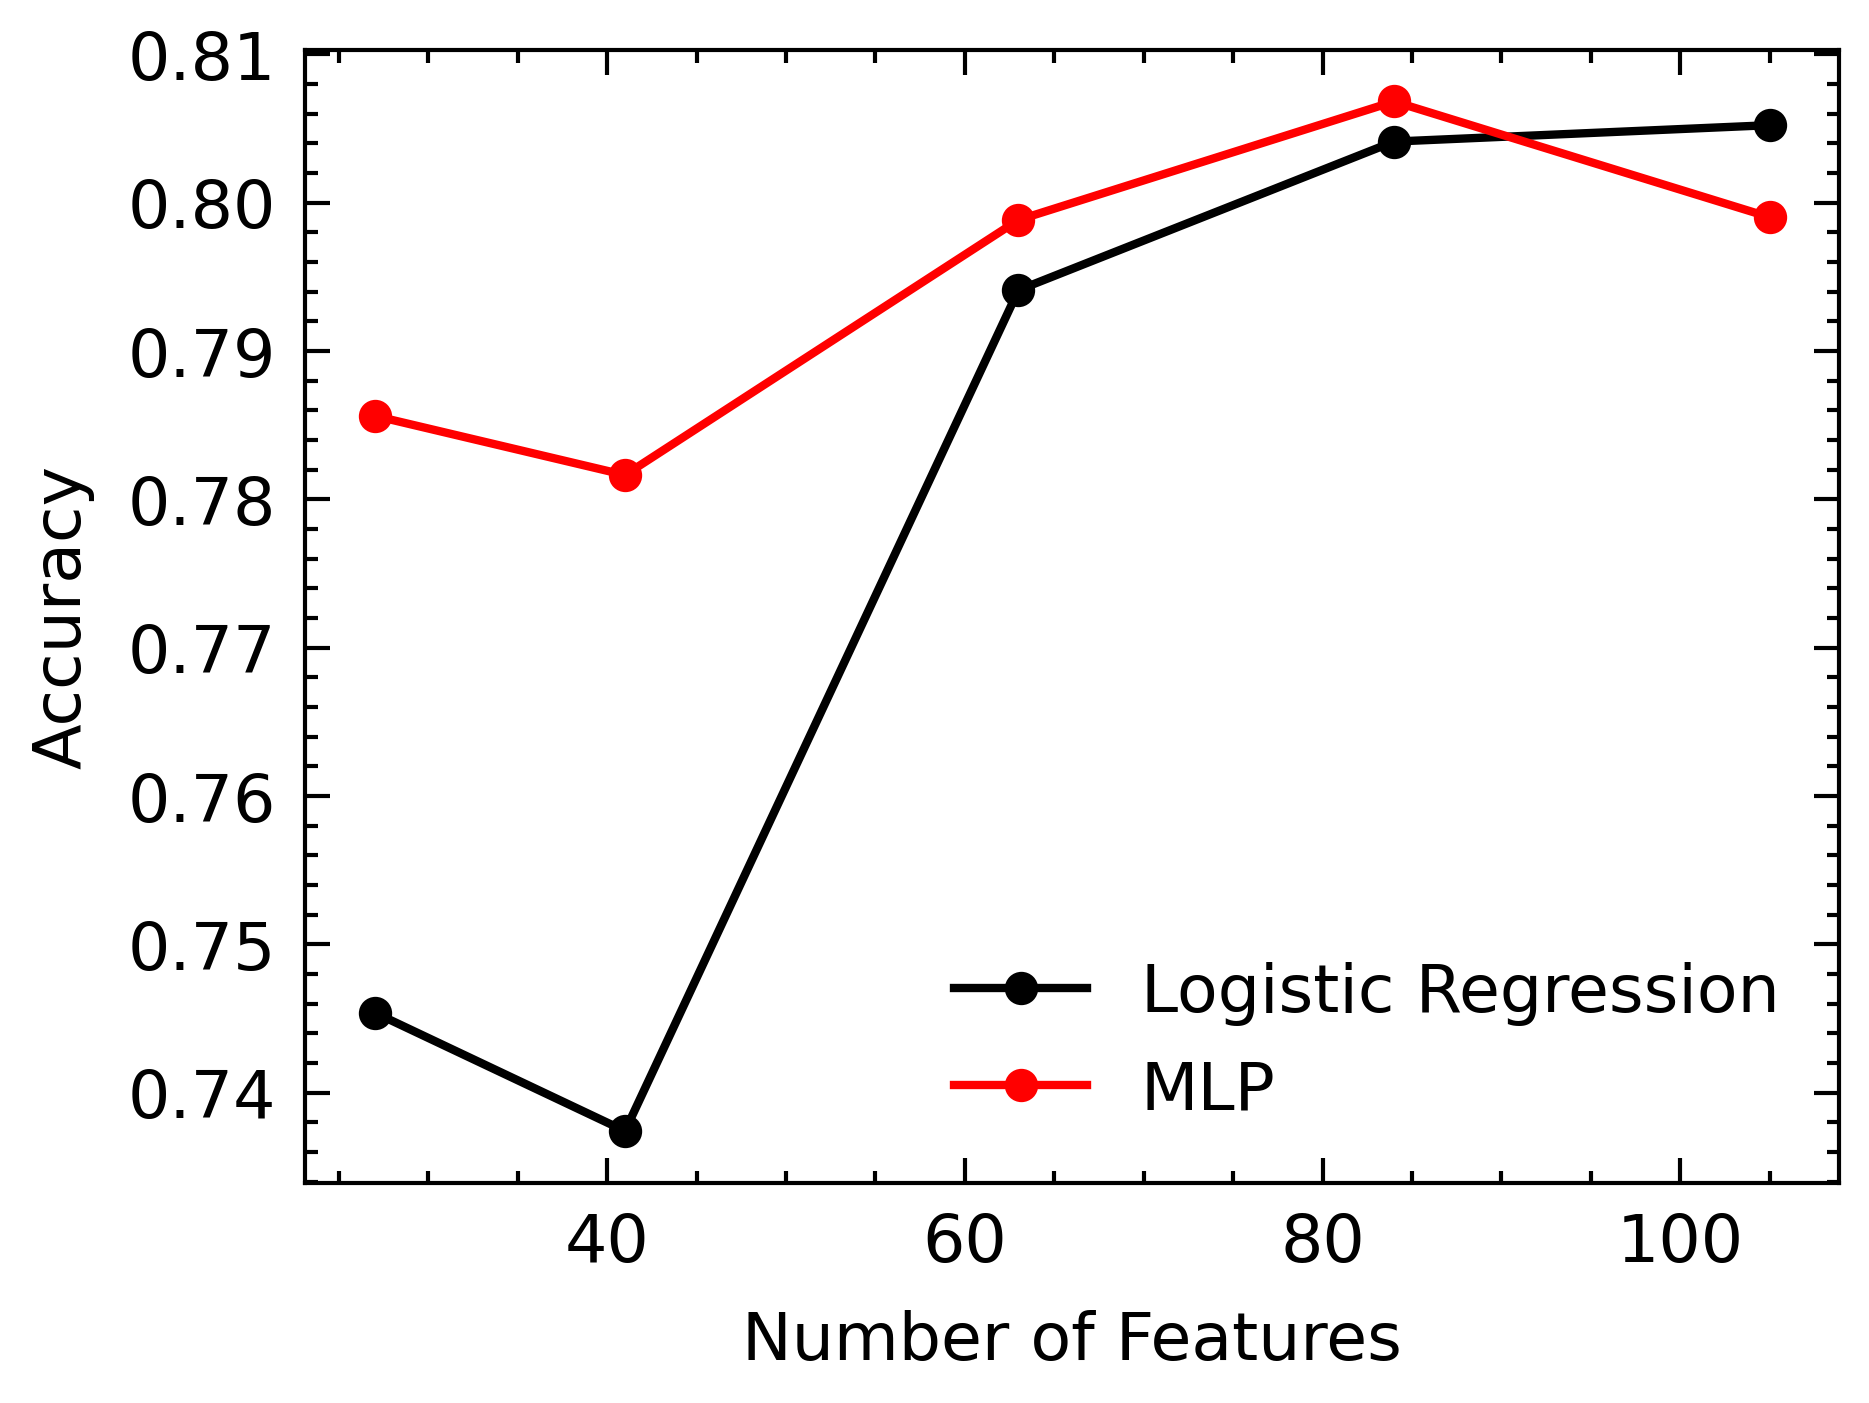

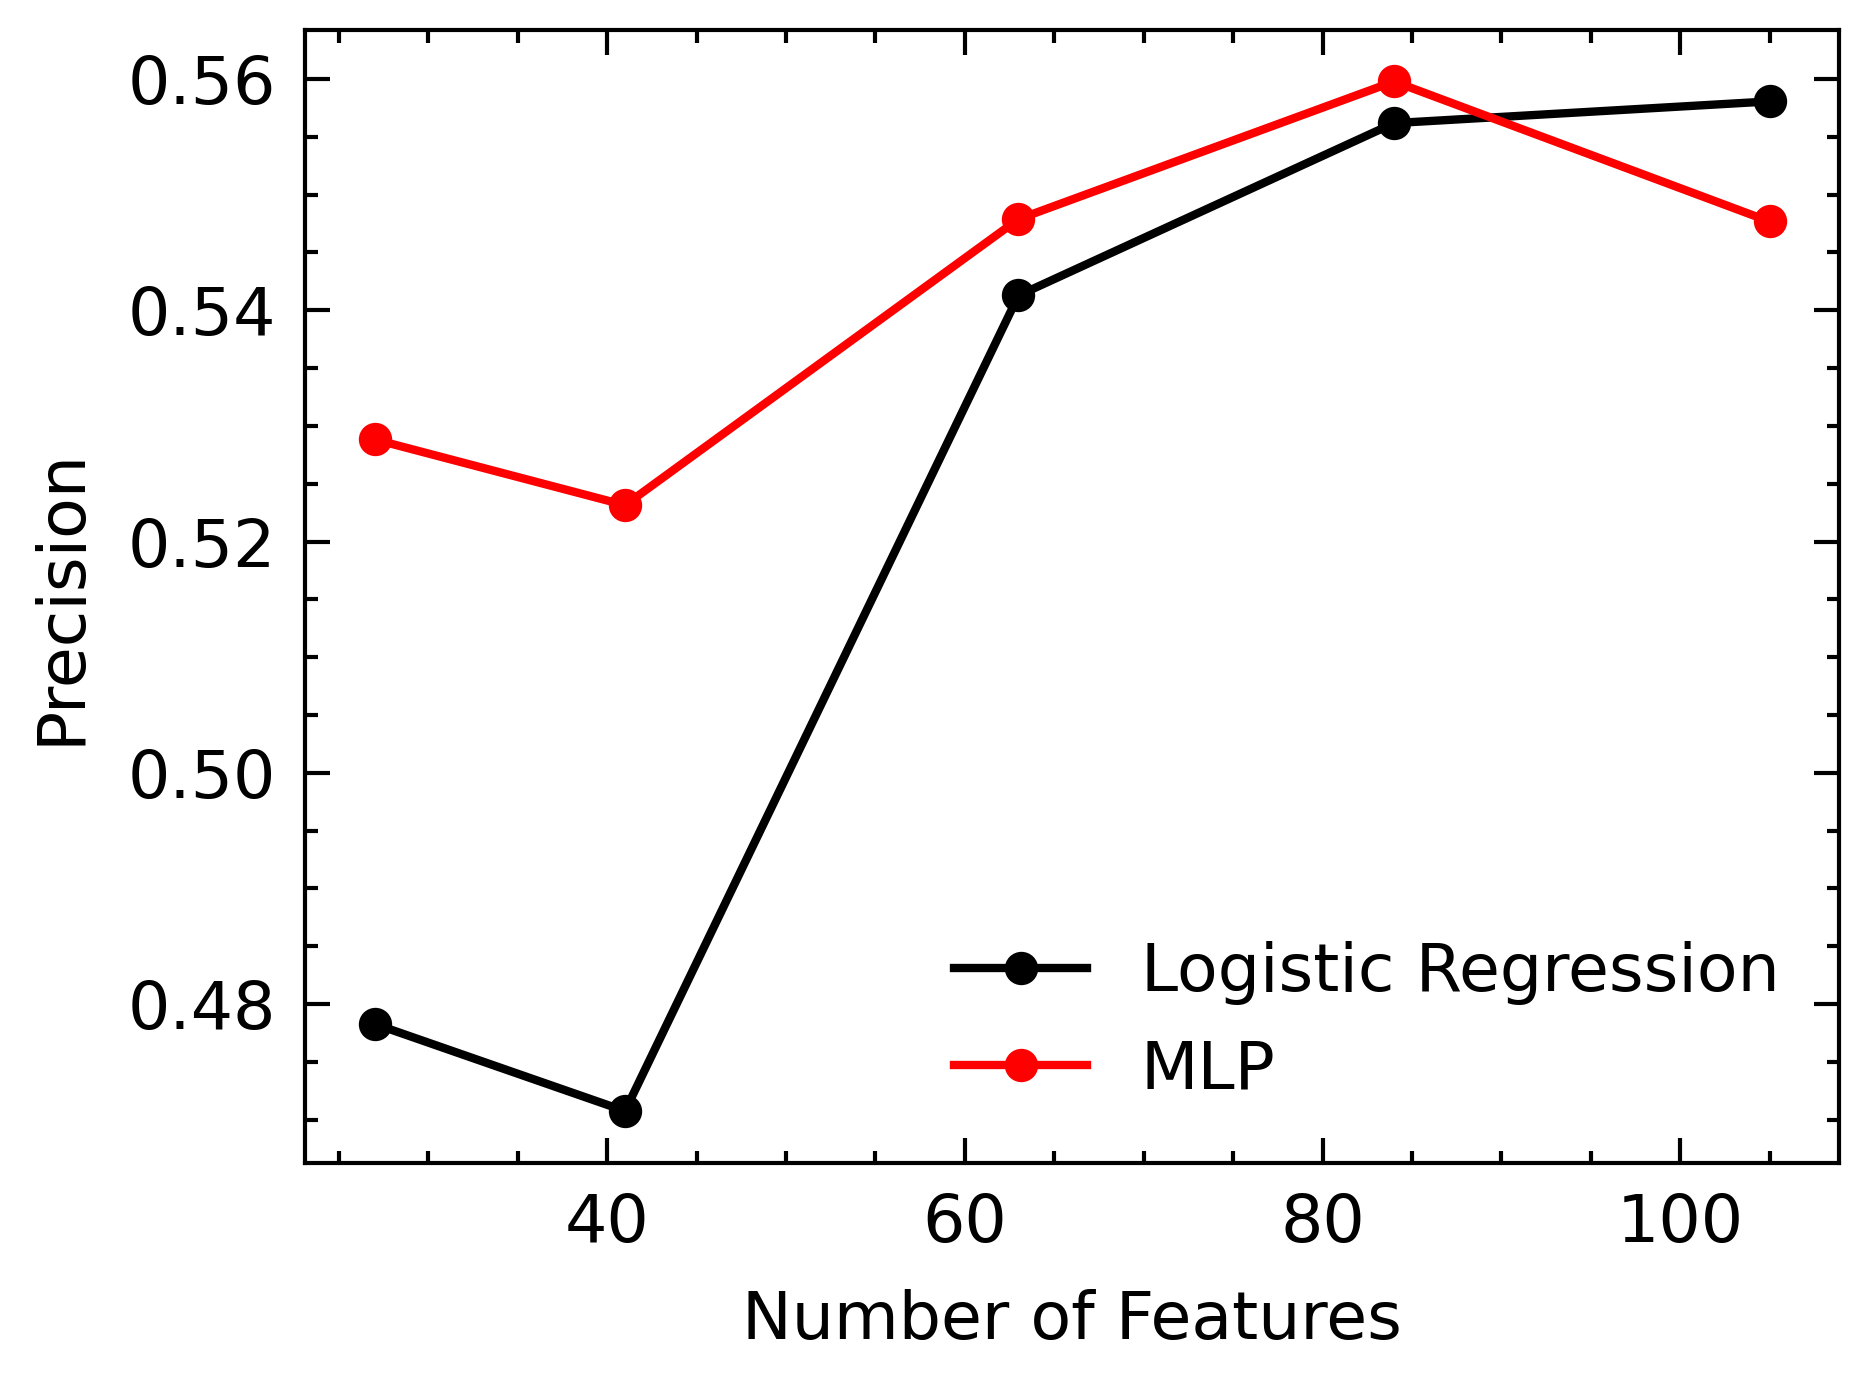

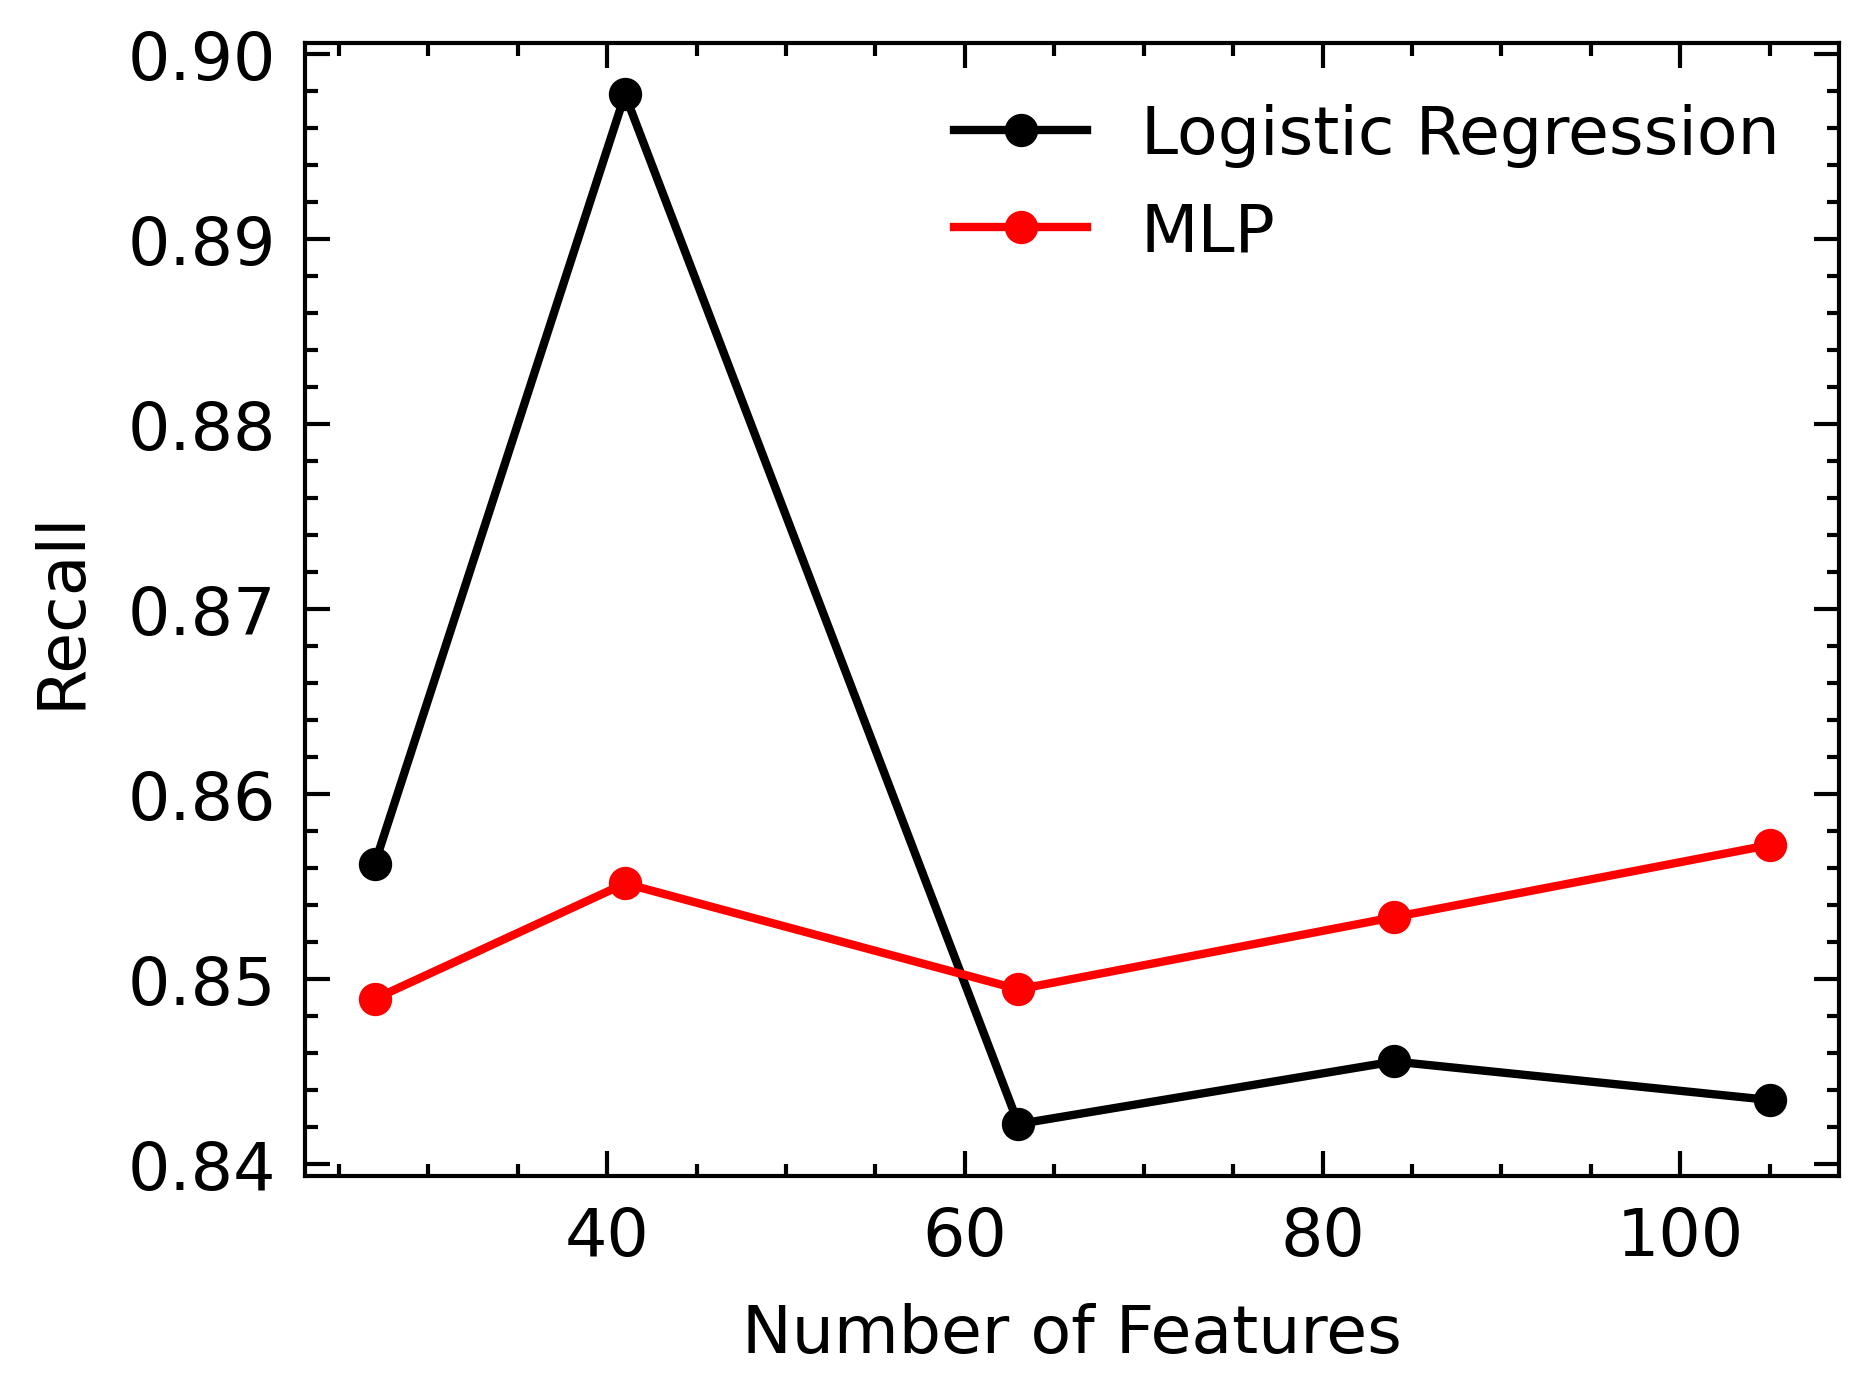

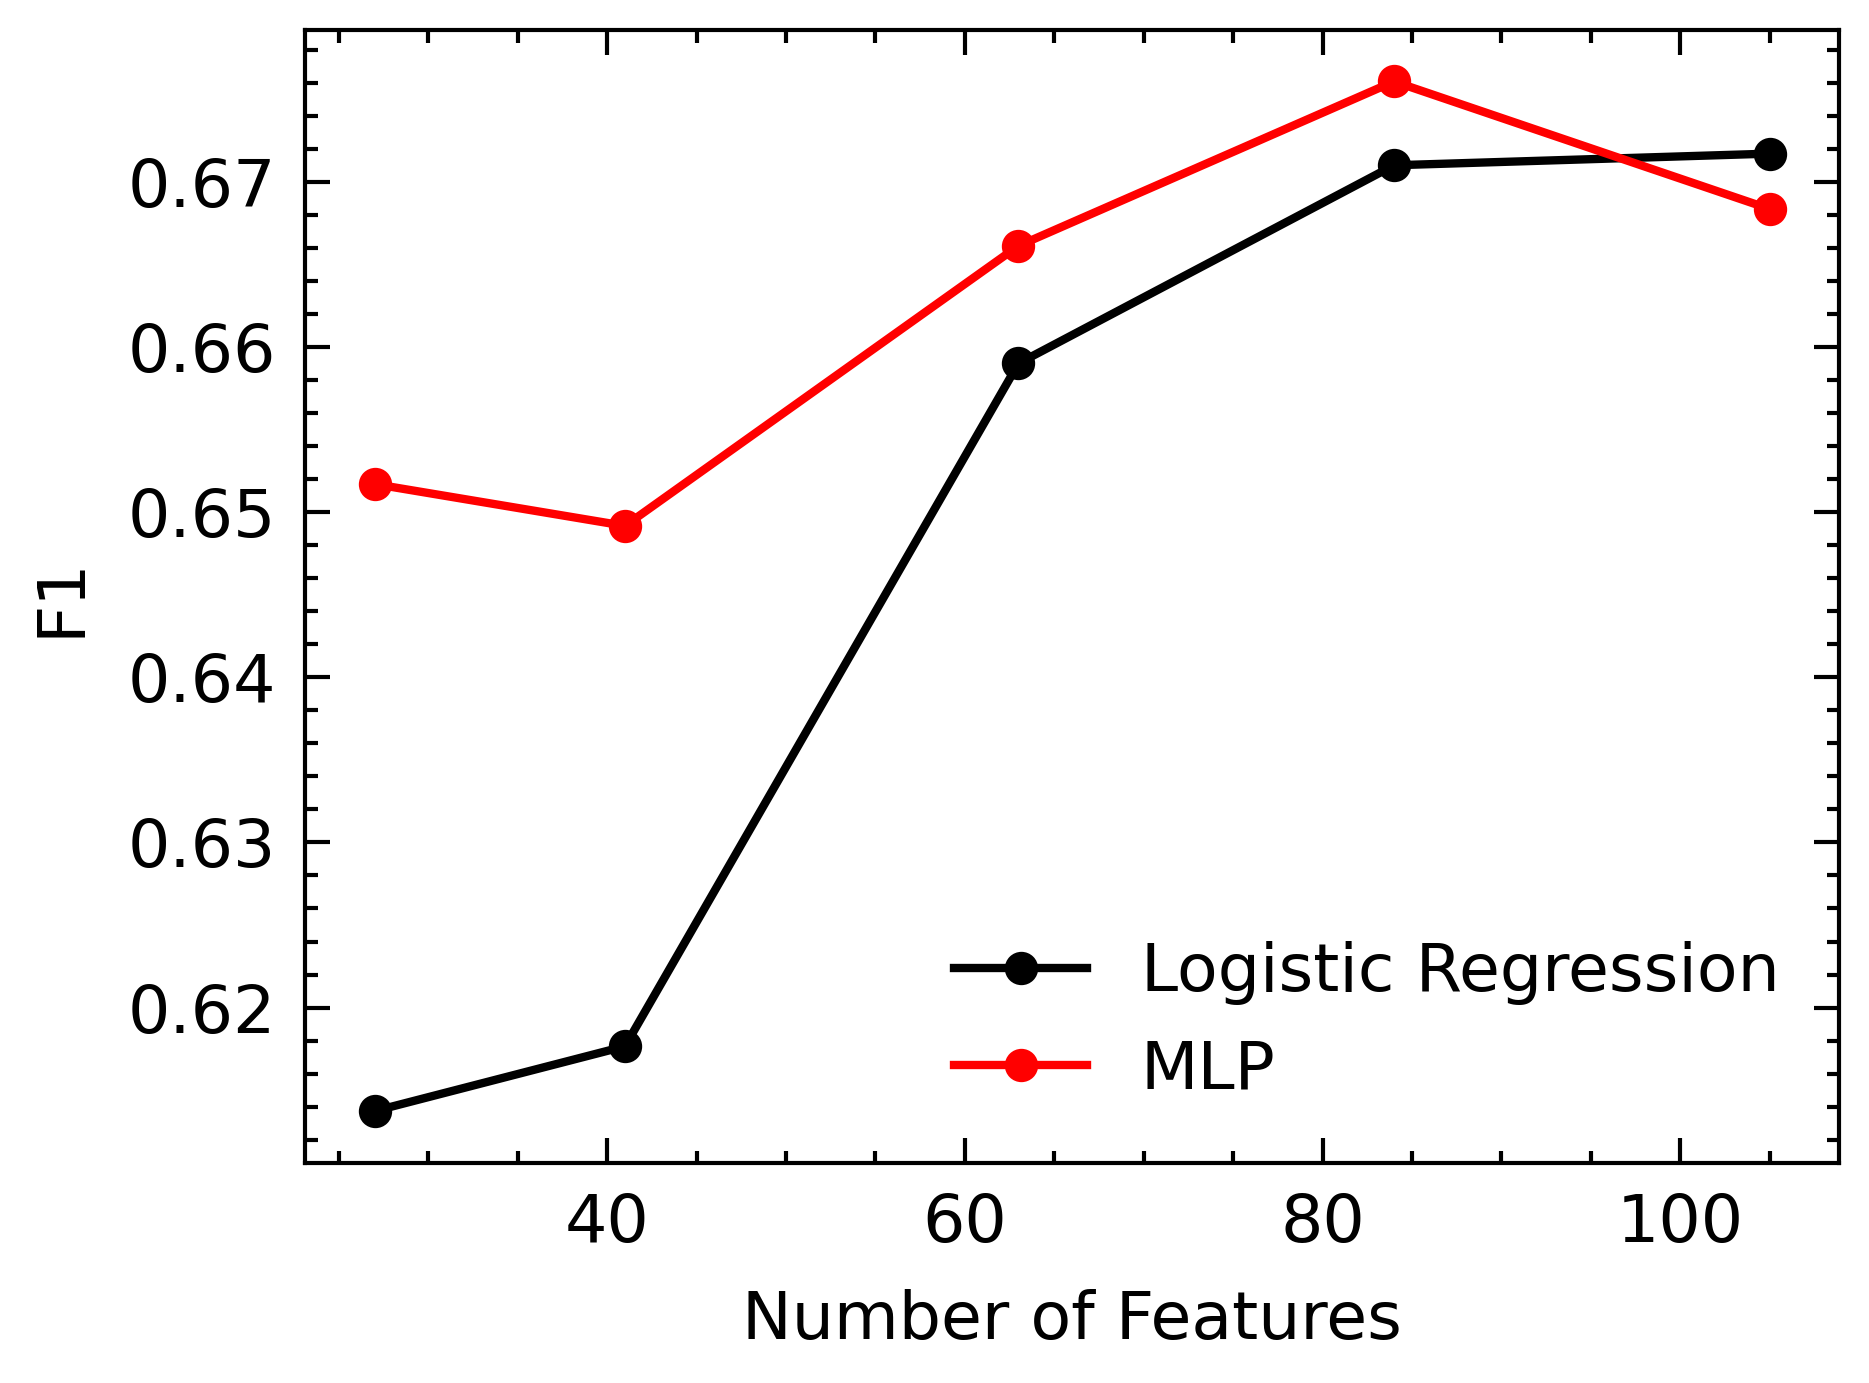

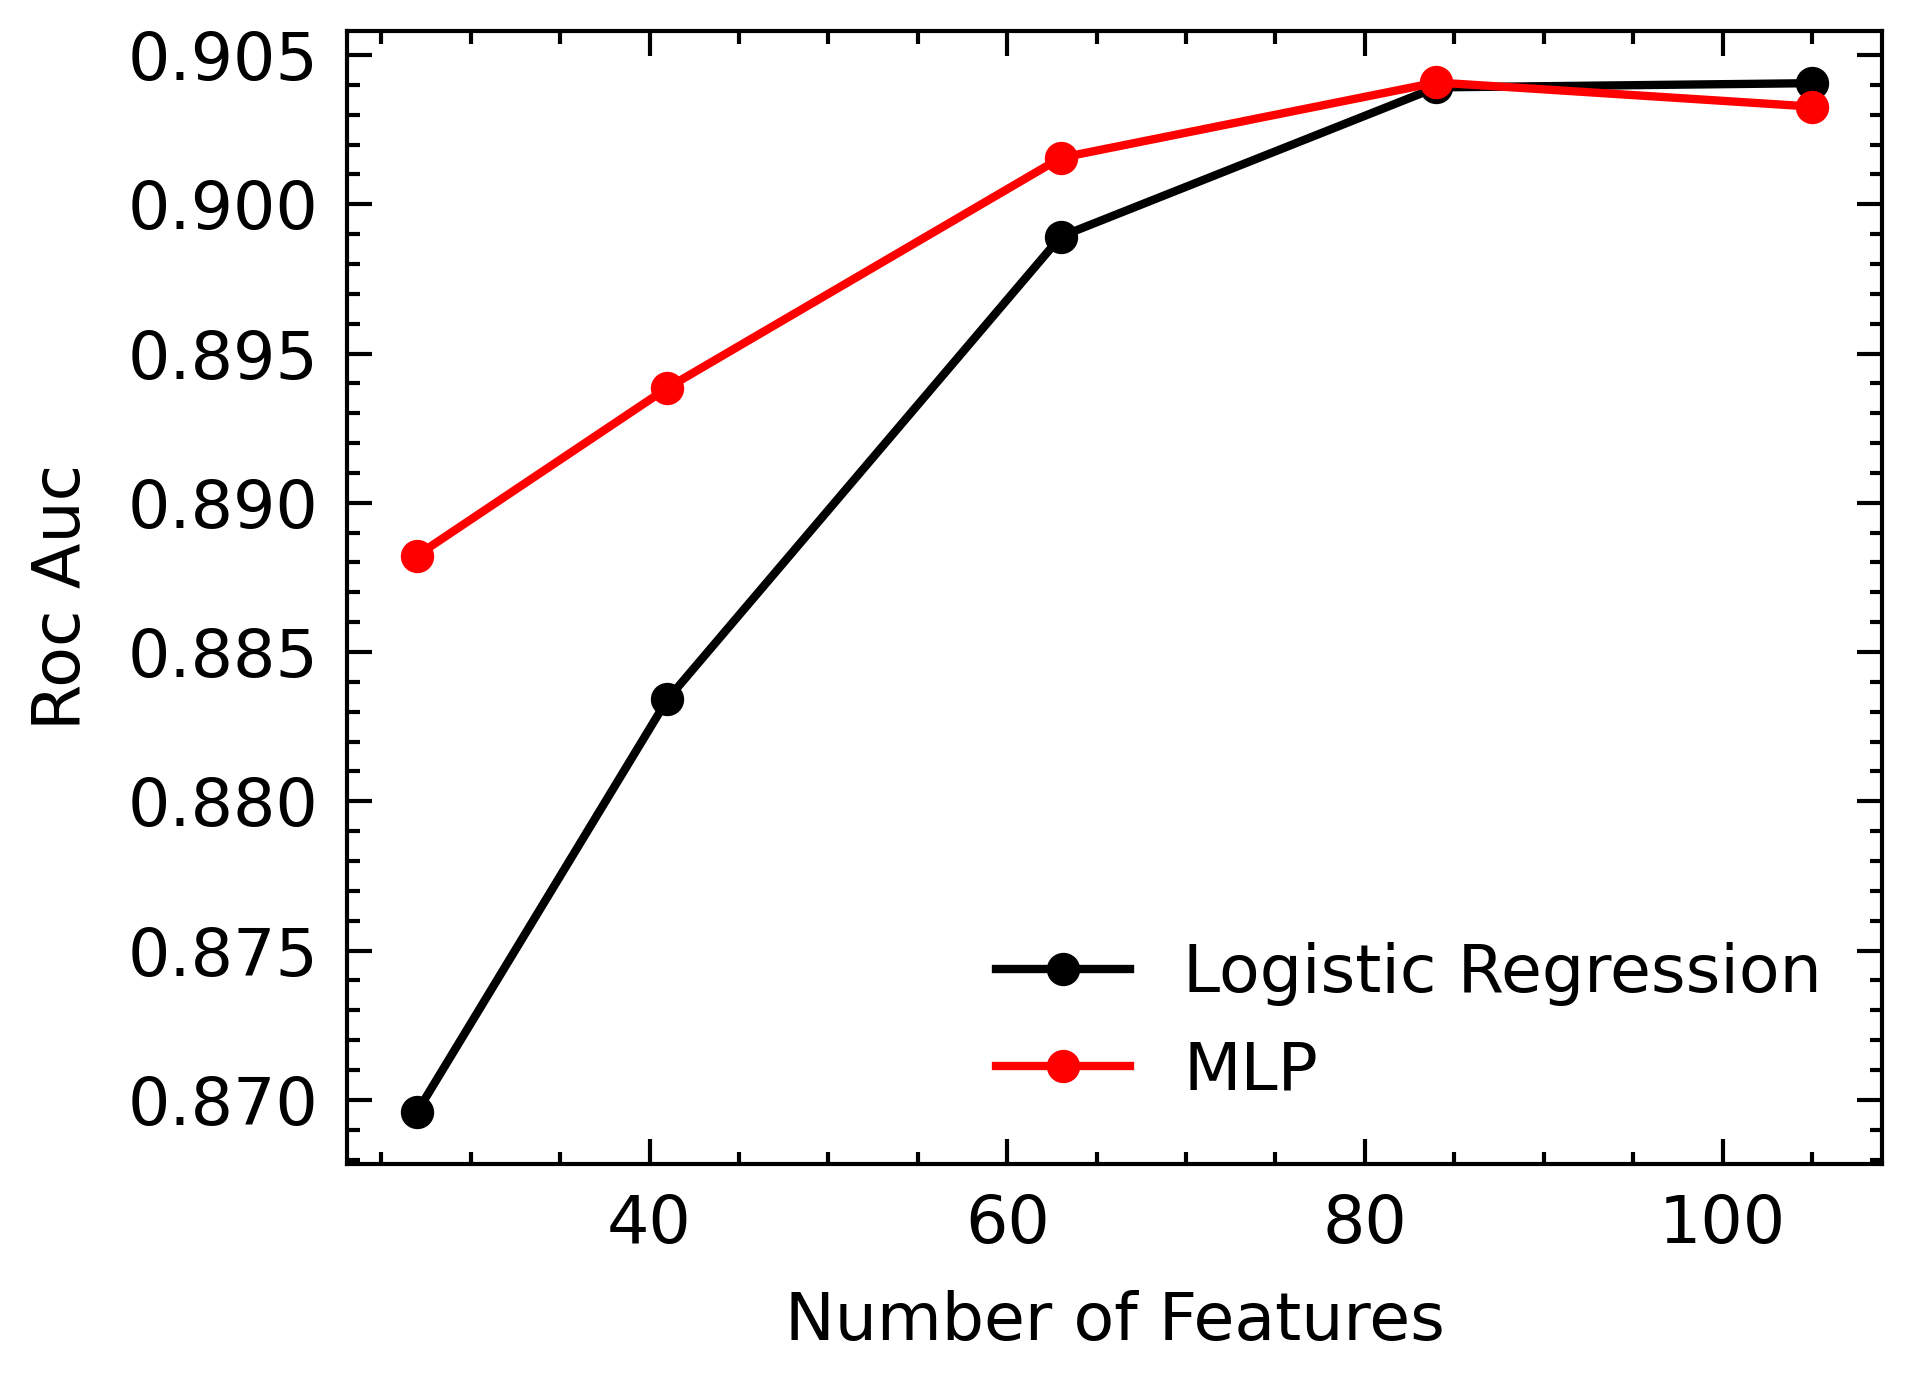

In [11]:
for metric in metrics:
    metricPrint = metric.replace('_', ' ').title()
    fig, ax = plt.subplots()
    ax.plot(logReg.nDims, logReg['bestTest'+metric.capitalize()], 'o-', markersize=3, label = 'Logistic Regression')
    ax.plot(MLP.nDims, MLP['bestTest'+metric.capitalize()], 'o-', markersize=3, label = 'MLP')
    ax.set_xlabel('Number of Features')
    ax.set_ylabel(metricPrint)
    plt.legend()
    plt.savefig(f'figures/Combined/nDimsVs{metricPrint}Combined.png', bbox_inches='tight')
    plt.show()